# IDENTIFIKANI DAUN TANAMAN MENGGUNAKAN METODE CONVOLUTIONALNEURAL NETWORK (CNN)

Nama    : Kavin Nafis Maulana

NIM     : A11.2022.14253

Kelompok: A11.4410




**Ringkasan** 

Daun adalah salah satu bagian terpenting yang dimiliki oleh sebuah tanaman. Daun penting
bagi tanaman dikarenakan merupakan organ yang melakukan fotosintetis. Tidak hanya penting bagi
tumbuhan, daun juga penting bagi manusia. Manusia dapat menggunakan daun sebagai sumber
makanan dan juga sebagai obat herbal. Karena itulah, penting halnya kita dapat membedakan daundaun yang ada di sekitar kita. Salah satu cara untuk membedakan daun-daun tersebut adalah dengan
membuat mesin yang dapat mengklasifikasikan daun secara otomatis menggunakan metode CNN.

**Latar Belakang**

Daun merupakan salah satu organ terpenting yang dimiliki suatu tanaman. Daun penting
bagi tumbuhan dikarenakan daun berfungsi sebagai organ fotosintetik. Organ fotosintetik
memiliki fungsi yaitu proses pengubahan senyawa air (H2O) dan karbon-dioksida (CO2)
Menjadi senyawa Glukosa (C6H12O6) yang kemudian disimpan dalam bentuk buah.
Tidak hanya penting bagi tumbuhan, daun juga sama pentingnya bagi manusia. Hal ini
dikarenakan daun dapat menyerap karbon-dioksida (CO2) yang berbahaya disekitar manusia.
Selain itu, daun juga dapat berfungsi juga sebagai sumber makanan maupun obat-obatan

**Masalah**

Masyarakat Indonesia kerap mengkonsumsi daun untuk sumber makanan dan juga
sebagai obat-obatan, seperti contohnya daun pepaya yang biasanya menjadi obat untuk demam
berdarah. Karena itulah penting untuk kita mengetahui dan bisa membedakan daun-daunan
yang ada agar kita dapat mengkonsumsi daun itu untuk kesehatan kita.

**Alur**

![alt text](alur-1.png)



# Inisiasi

In [7]:

import pandas as pd
import numpy as np 

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import glob, cv2, os
import pathlib

import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')

blok koding diatas digunakan untuk mendefine library-library yang dibutuhkan untuk memproses gambar

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

Blok diatas digunakan untuk membatasi penggunaan gpu saat meruning program/blok kode

# Dataset


Saya menggunakan dataset yang bersumber dari website [Kaggle](https://www.kaggle.com/datasets/riteshranjansaroj/segmented-medicinal-leaf-images/data) yang bernama
“Segmented Medicinal Leaf Image” yang menyediakan data publik. Data ini berisi gambargambar dari daun yang akan digunakan sebagai identifikasi jenis daun berjumlah 1835
gambar dari 30 kelas/jenis daun.

spesifikasi data yang lain :
1) Ukuran gambar 1600x1200 pixel
2) Total gambar yang ada sebanyak 1835 yang akan dibagi menjadi 912 sebagai training, 543 sebagai validation, dan 380 sebagai test


In [3]:
data_train_path = 'data/train'
data_test_path = 'data/test'
data_val_path = 'data/val'


Variabel-variabel yang berisi path/lokasi dari dataset yang akan digunakan

In [4]:
labels = pathlib.Path(data_train_path)
label_names=np.array(sorted([item.name for item in labels.glob('*')]))
print(label_names)

['Alpinia Galanga (Rasna)' 'Amaranthus Viridis (Arive-Dantu)'
 'Artocarpus Heterophyllus (Jackfruit)' 'Azadirachta Indica (Neem)'
 'Basella Alba (Basale)' 'Brassica Juncea (Indian Mustard)'
 'Carissa Carandas (Karanda)' 'Citrus Limon (Lemon)'
 'Ficus Auriculata (Roxburgh fig)' 'Ficus Religiosa (Peepal Tree)'
 'Hibiscus Rosa-sinensis' 'Jasminum (Jasmine)' 'Mangifera Indica (Mango)'
 'Mentha (Mint)' 'Moringa Oleifera (Drumstick)'
 'Muntingia Calabura (Jamaica Cherry-Gasagase)' 'Murraya Koenigii (Curry)'
 'Nerium Oleander (Oleander)' 'Nyctanthes Arbor-tristis (Parijata)'
 'Ocimum Tenuiflorum (Tulsi)' 'Piper Betle (Betel)'
 'Plectranthus Amboinicus (Mexican Mint)'
 'Pongamia Pinnata (Indian Beech)' 'Psidium Guajava (Guava)'
 'Punica Granatum (Pomegranate)' 'Santalum Album (Sandalwood)'
 'Syzygium Cumini (Jamun)' 'Syzygium Jambos (Rose Apple)'
 'Tabernaemontana Divaricata (Crape Jasmine)'
 'Trigonella Foenum-graecum (Fenugreek)']


Memperlihatkan label-label yang tersedia didalalam dataset

In [5]:
tf.random.set_seed(10)

train_data= ImageDataGenerator(rescale = 1./255)
val_data= ImageDataGenerator(rescale = 1./255)
test_data= ImageDataGenerator(rescale = 1./255)

In [6]:
training_data = train_data.flow_from_directory(data_train_path,
batch_size=64,target_size=(100, 100), 
subset='training',class_mode='categorical',seed=10)

validation_data = val_data.flow_from_directory(data_val_path,
batch_size=64,target_size=(100, 100), 
subset='training',class_mode='categorical',seed=10,shuffle=False) 

testing_data = test_data.flow_from_directory(data_test_path,
batch_size=64,target_size=(100, 100), 
subset='training',class_mode='categorical',seed=10)

Found 912 images belonging to 30 classes.
Found 543 images belonging to 30 classes.
Found 380 images belonging to 30 classes.


memberikan index kesetiap label

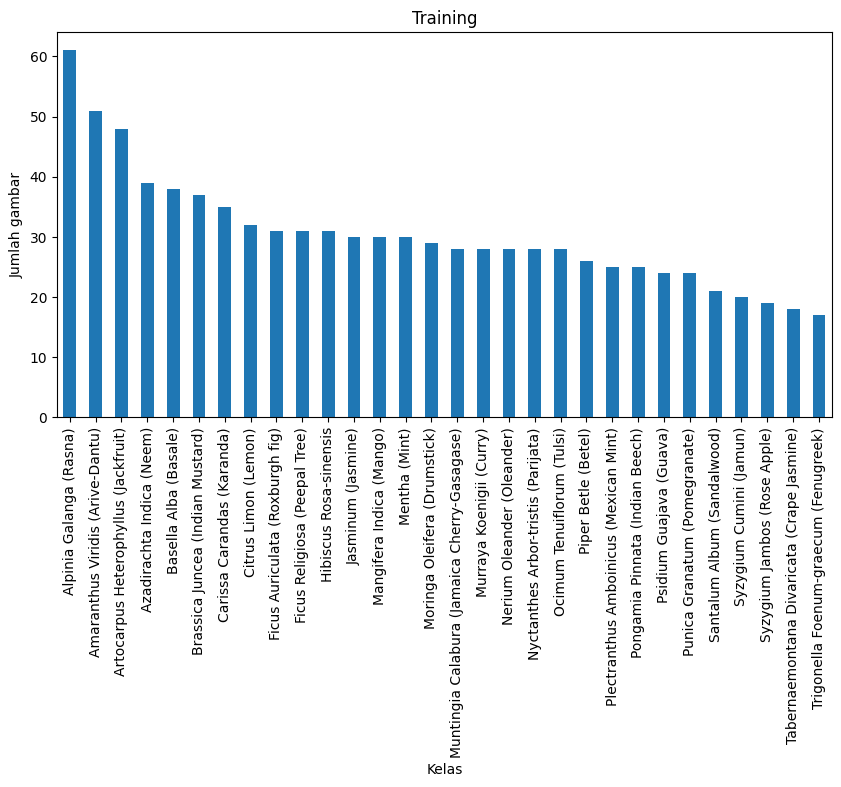

In [14]:
def plot_class_distribution(generator):
    class_counts = pd.Series(generator.classes).value_counts()
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(10, 5))
    class_counts.plot(kind='bar')
    plt.title('Training')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah gambar')
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)
    plt.show()

plot_class_distribution(training_data)


Graph yang menunjukkan jumlah gambar yang ada di dalam 1 folder/kelas yang digunakan pada train

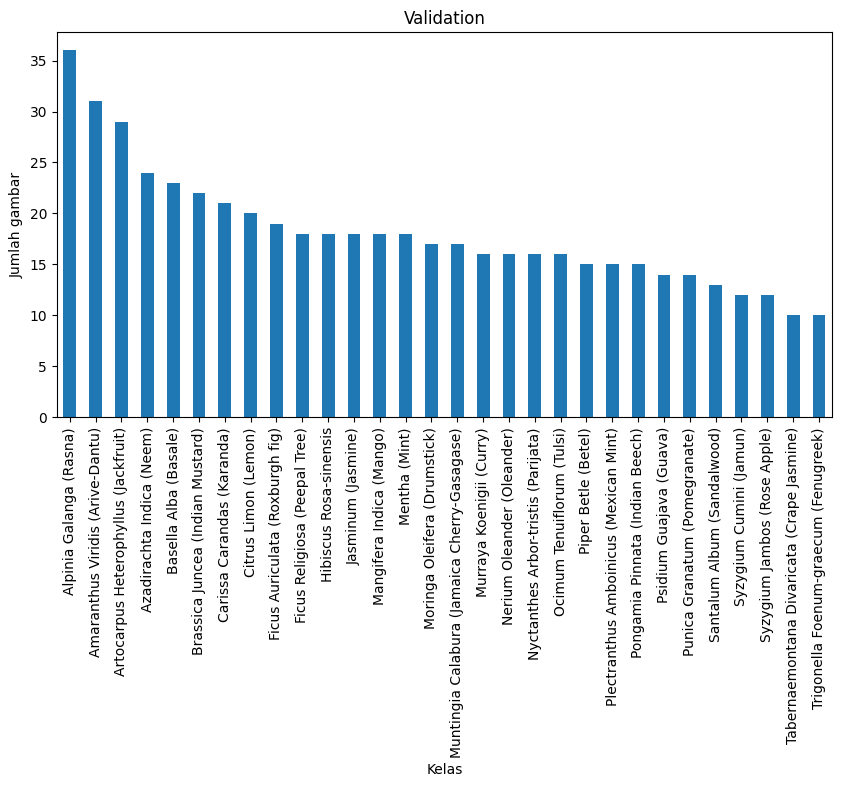

In [13]:
def plot_class_distribution(generator):
    class_counts = pd.Series(generator.classes).value_counts()
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(10, 5))
    class_counts.plot(kind='bar')
    plt.title('Validation')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah gambar')
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)
    plt.show()

plot_class_distribution(validation_data)


Graph yang menunjukkan jumlah gambar yang ada di dalam 1 folder/kelas yang digunakan pada validation

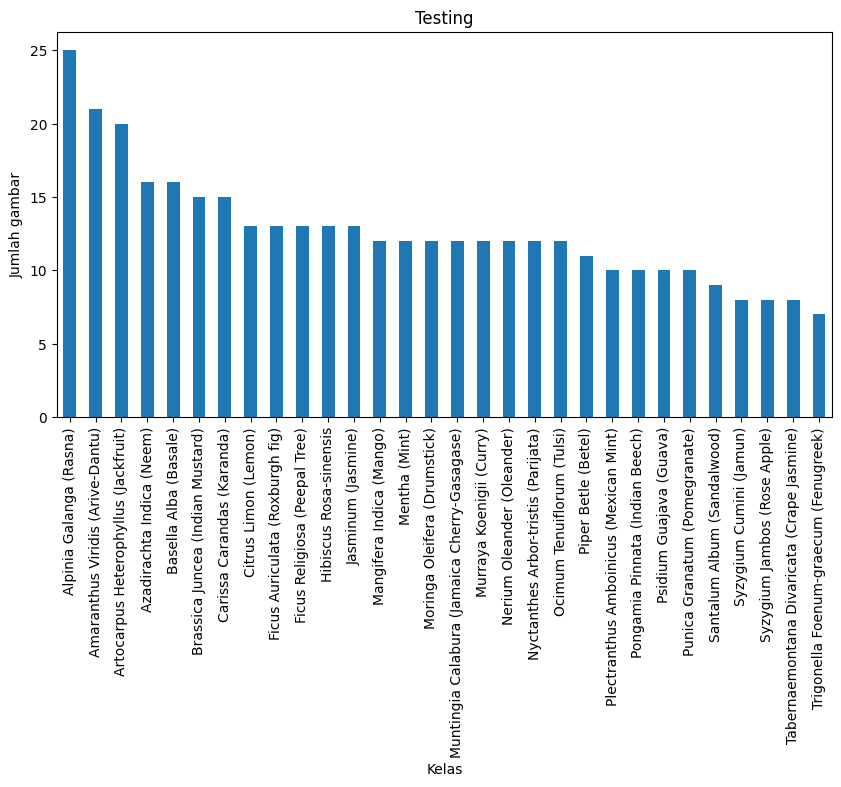

In [12]:
def plot_class_distribution(generator):
    class_counts = pd.Series(generator.classes).value_counts()
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(10, 5))
    class_counts.plot(kind='bar')
    plt.title('Testing')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah gambar')
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)
    plt.show()

plot_class_distribution(testing_data)


Graph yang menunjukkan jumlah gambar yang ada di dalam 1 folder/kelas yang digunakan pada Testing

Found 912 files belonging to 30 classes.


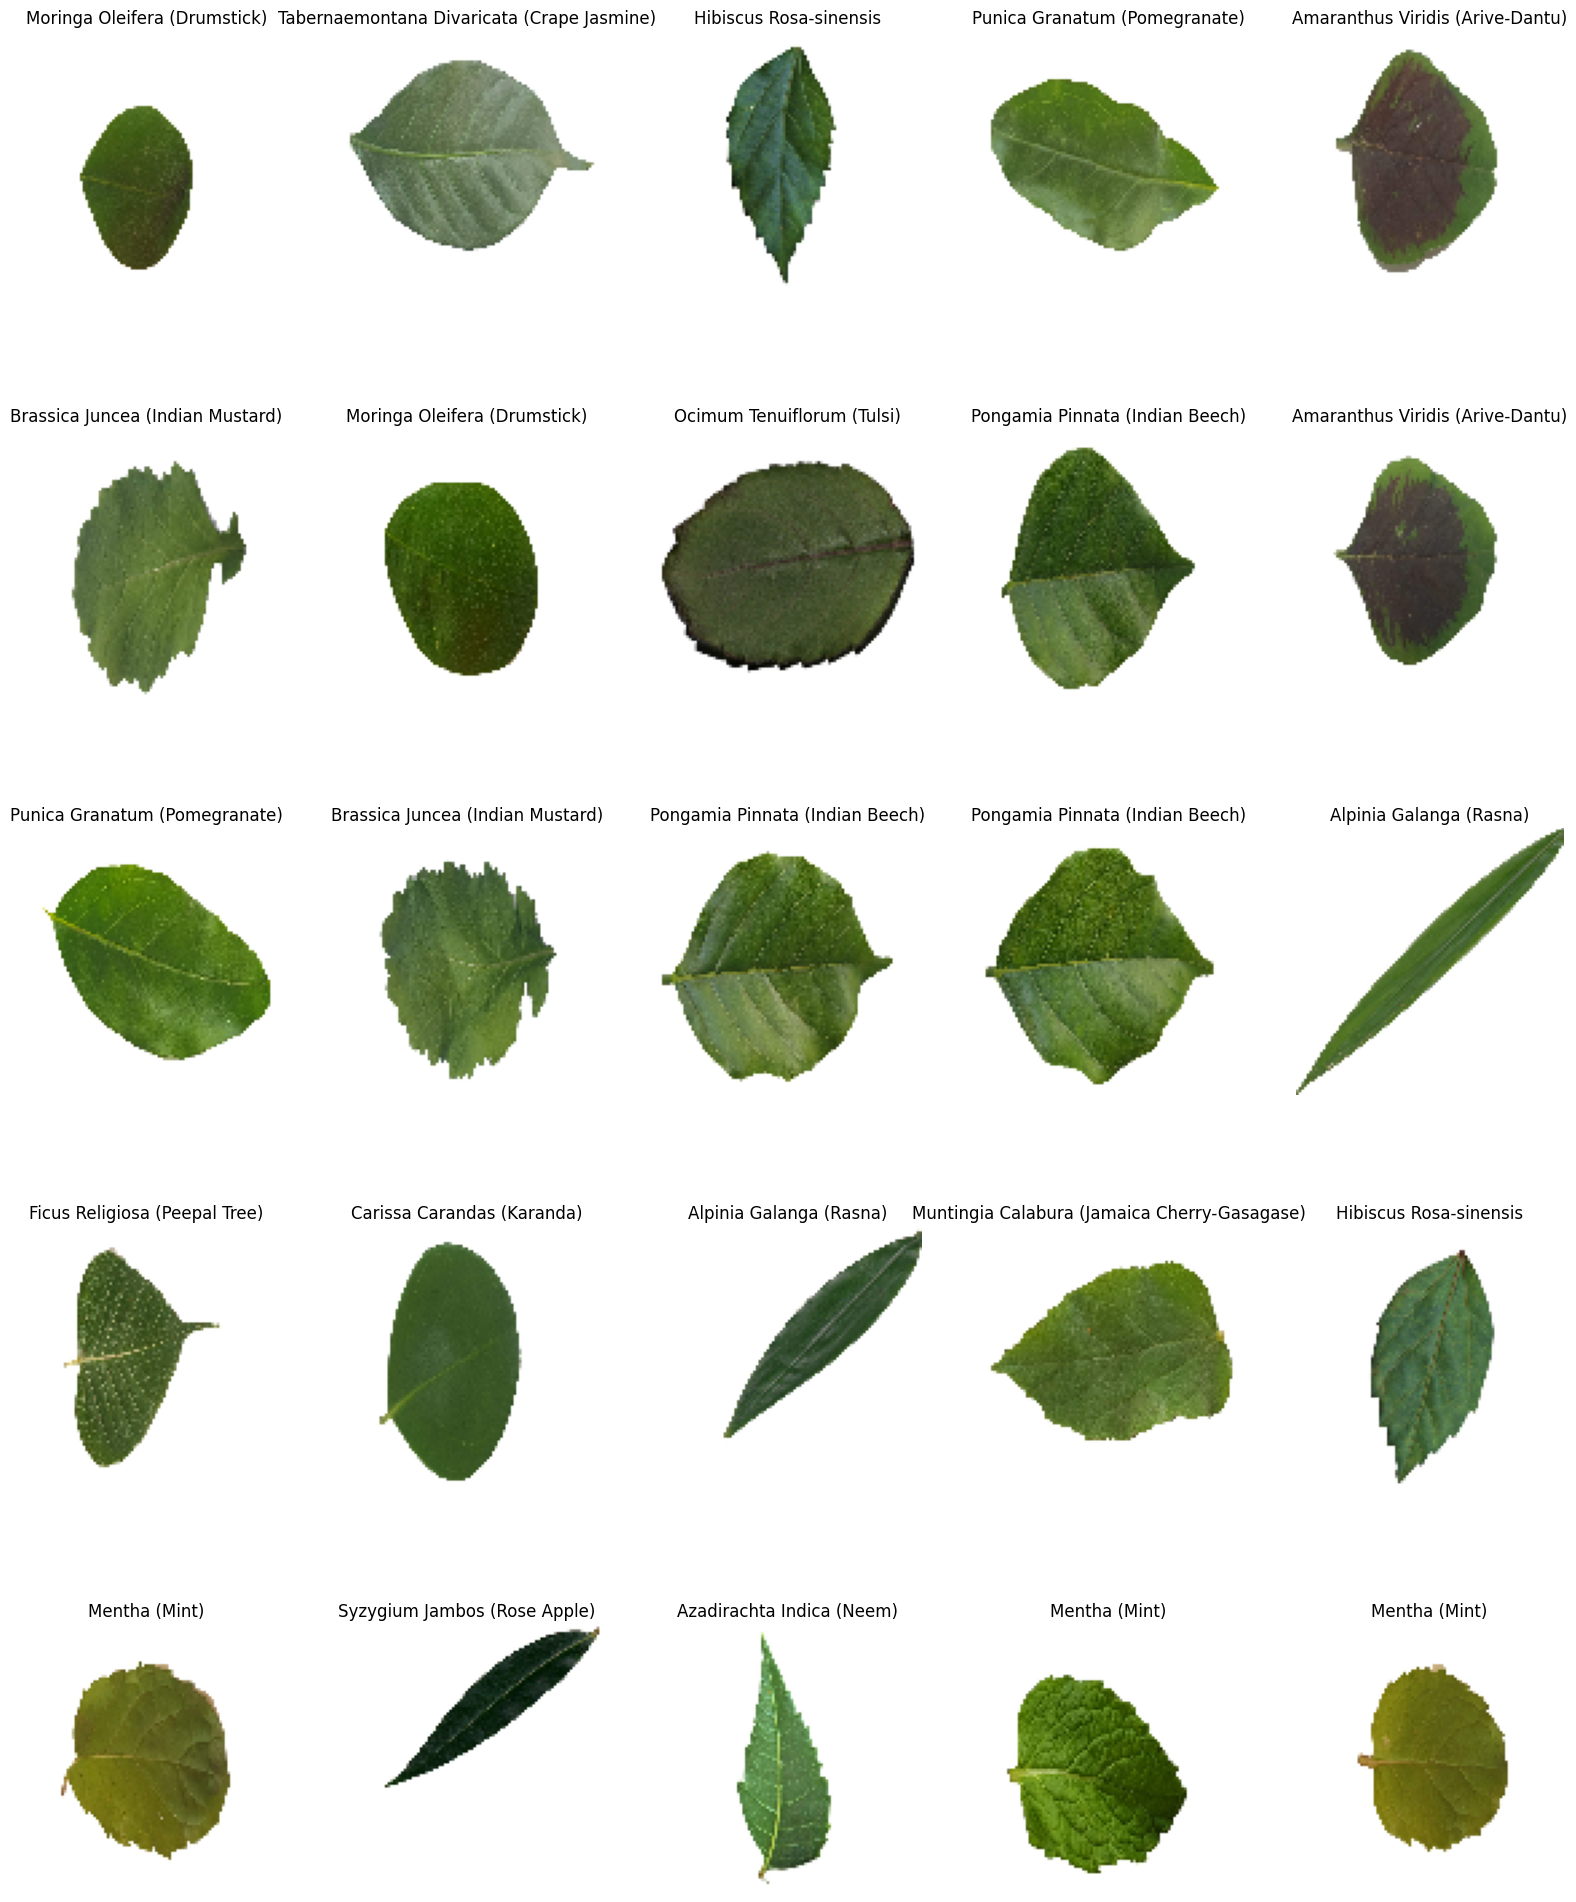

In [15]:
attribute = image_dataset_from_directory(data_train_path, image_size=(100,100))
plt.figure(figsize=(20,25))
for image, labels in attribute.take(1):
  for i in range (25):
    plt.subplot(5,5, i + 1)
    plt.imshow(np.array(image[i]).astype("uint8"))
    plt.title(attribute.class_names[labels[i]])
    plt.axis("off")

Memperlihatkan sample-sample image yang akan digunakan dan sudah di rescale menjadi 100x100 pixel

# Model & Learning

In [17]:
model = tf.keras.models.Sequential()
model.add(Conv2D(33, 3, padding='same', activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(2))
model.add(Conv2D(66, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(99, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='softmax'))  

Blok koding diatas digunakan untuk membangun sebuah arsitektur CNN yang menggunakan tensorflow untuk dapat melakukan klasifikasi dari sebuah gambar

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 33)   │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 33)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 66)     │        19,668 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 66)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 99)     │        58,905 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 99)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       114,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 33)             │       152,097 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,790 (1.32 MB)

 Trainable params: 346,790 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)]

model.compile(loss="categorical_crossentropy",
optimizer="Adam",metrics=['accuracy'])

- Callback EarlyStopping digunakan untuk menghentikan pelatihan lebih awal jika metrik yang dipantau tidak membaik setelah sejumlah epoch tertentu sehingga dapat terhindar dari overfitting
- Model compile digunakan untuk Mengatur parameter penting yang diperlukan untuk proses pelatihan model, termasuk fungsi loss, optimizer, dan metrik evaluasi, sehingga model dapat dilatih dengan benar pada data yang diberikan

In [20]:
project = model.fit(training_data, epochs = 20, verbose=1, validation_data = validation_data, callbacks=callbacks)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0526 - loss: 3.3984 - val_accuracy: 0.0663 - val_loss: 3.3699
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0847 - loss: 3.3655 - val_accuracy: 0.0681 - val_loss: 3.3237
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 490ms/step - accuracy: 0.0700 - loss: 3.3042 - val_accuracy: 0.1565 - val_loss: 3.1981
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 466ms/step - accuracy: 0.1490 - loss: 3.1408 - val_accuracy: 0.2228 - val_loss: 2.9587
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.1894 - loss: 2.9665 - val_accuracy: 0.2413 - val_loss: 2.7305
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 486ms/step - accuracy: 0.2195 - loss: 2.8773 - val_accuracy: 0.2910 - val_loss: 2.5988
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 534ms/step - accuracy: 0.2409 - loss: 2.5775 - val_accuracy: 0.2707 - val_loss: 2.6246
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 559ms/step - accuracy: 0.2736 - loss: 2.5433 - val_accuracy: 0.3

In [21]:
model.save('cnn.h5')


# Performa

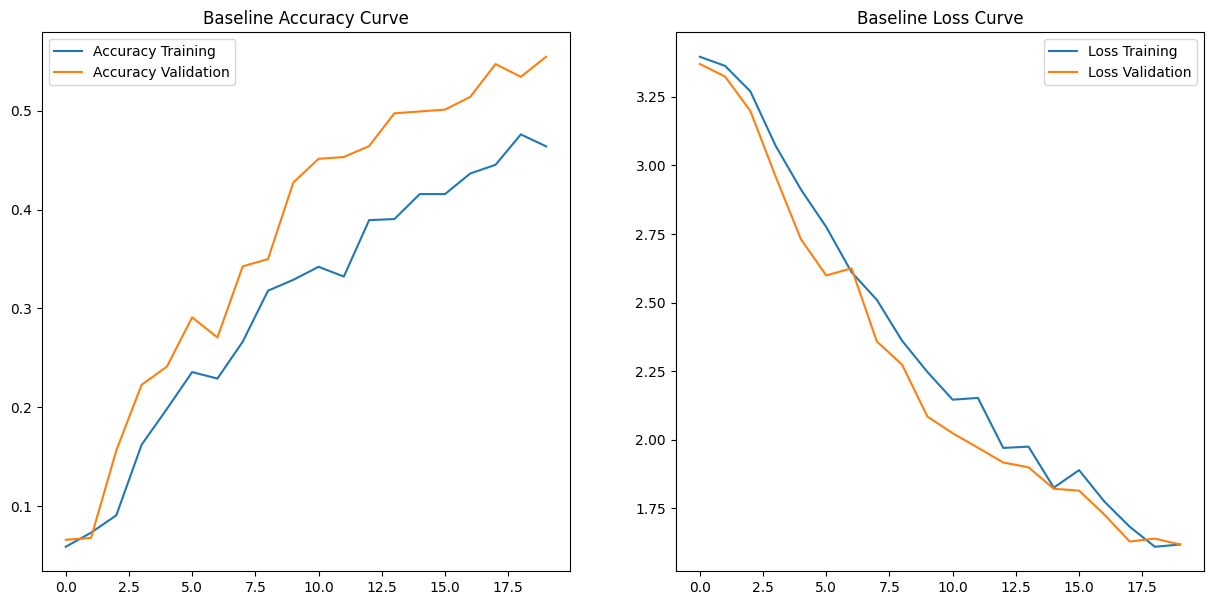

In [23]:
# evaluation model evaluation in plot shape
metrics = pd.DataFrame(project.history) #create dataframe of learn model training

#accuracy plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Accuracy Training')
plt.plot(metrics.val_accuracy, label='Accuracy Validation')
plt.title('Baseline Accuracy Curve')
plt.legend()

#loss plot
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Loss Training')
plt.plot(metrics.val_loss, label='Loss Validation')
plt.title('Baseline Loss Curve')
plt.legend()
plt.show()

In [53]:
# classification validation set
y_pred = model.predict(validation_data)
y_pred = np.argmax(y_pred, axis=1)

hasil = classification_report(validation_data.labels, 
y_pred, labels = np.arange(33), 
target_names= list(validation_data.class_indices.keys()))
print(hasil)

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 798ms/step
                                              precision    recall  f1-score   support

                     Alpinia Galanga (Rasna)       0.72      0.87      0.79        15
            Amaranthus Viridis (Arive-Dantu)       0.60      0.72      0.66        36
        Artocarpus Heterophyllus (Jackfruit)       0.65      0.94      0.77        16
                   Azadirachta Indica (Neem)       0.33      0.06      0.10        18
                       Basella Alba (Basale)       0.67      0.71      0.69        31
            Brassica Juncea (Indian Mustard)       0.00      0.00      0.00        10
                  Carissa Carandas (Karanda)       0.75      0.68      0.71        22
                        Citrus Limon (Lemon)       0.75      0.18      0.29        17
             Ficus Auriculata (Roxburgh fig)       0.00      0.00      0.00        15
               Ficus Religiosa (Peepal Tree)       0.46      0.89      0.61        19
              

Karena menurut saya hasil dari model dan training pertama sudah bagus, maka saya tidak melakuan pembuatan model dan training lagi

# Hasil

In [51]:
model = tf.keras.models.load_model('cnn.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


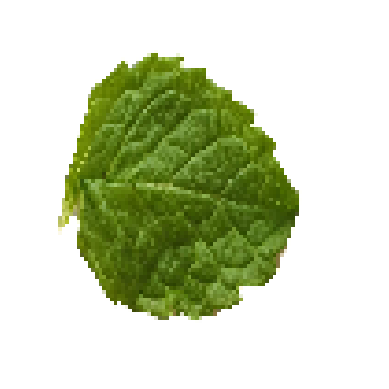

Daun ini adalah : Mentha (Mint)
dengan akurasi  : 83.69055986404419 %


In [54]:

img_path = 'daun.jpg'
img = image.load_img(img_path, target_size=(100, 100)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 

img_array /= 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
acc = np.max(predictions)
label_names = np.array(list(training_data.class_indices.keys()))
class_name = label_names[predicted_class[0]]

plt.imshow(img)
plt.axis('off')
plt.show()

print(f'Daun ini adalah : {class_name}')
print('dengan akurasi  :',(acc*100),'%')


# Kesimpulan

Model CNN yang sudah dibuat dan dilatih berhasil mendapat nilai akurasi training sekitar 46% dan pada saat melakukan prediksi 'daun.jpg', sudah dapat menklasifikasi daun secara benar dengan tingkat keyakinan sekitar 83%.

Ini menunjukkan bahwa model CNN sudah dapat mengenali pola yang ada di dalam gambar dengan baik, tetapi model masih memiliki tingkat akurasi yang rendah, hal ini mungkin terjadi karena kurangnya training, data yang kurang banyak/kompleks dan masih adanya overfitting/underfitting di dalam model.

